# Max-Cut Sample - Hybrid


In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import dwave_networkx as dnx
import dimod

### Helper Functions

In [2]:
def draw_graph(G,cut,pos):
    colors = [ 'g' if n in cut else 'r' for n in G.nodes() ]
    nx.draw(G,with_labels=False,alpha=0.6,node_size=50,node_color=colors,pos=pos)
    
def cut_size(G,cut):
    edges = 0
    for c in cut:
        for n in G.neighbors(c):
            if n not in cut:
                edges += 1
    return edges
    


## Problem as Graph

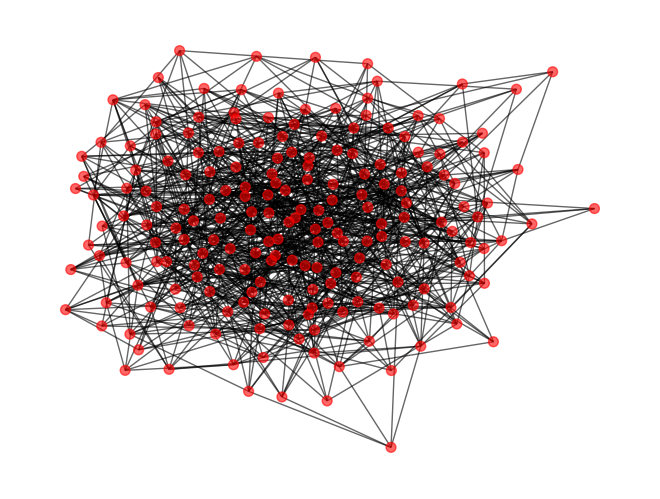

In [3]:
# fixed graph
#G = nx.Graph()
#G.add_nodes_from([0,1,2,3,4])
#G.add_edges_from([(0,1),(1,2),(2,3),(3,0),(0,4),(2,4),(3,4),(1,4)])

# loaded sample graph
G = nx.read_edgelist('../sample_graphs/200-nodes-sample.dat',nodetype=int)

#n = 4
#p = 0.3
#H = nx.gnp_random_graph(n, p)
pos = nx.spring_layout(G)

#nx.draw(G,with_labels=True,alpha=0.6,node_size=300,pos=pos)
draw_graph(G,{},pos)

In [4]:
print('Graph: ',len(G.nodes()), 'nodes, density: ',nx.density(G))

Graph:  200 nodes, density:  0.051306532663316584


## Exact Solver

In [5]:
exactsolver = dimod.ExactSolver()

In [6]:
#import time

#ts_start = time.time()
#cut = dnx.maximum_cut(G, exactsolver)
#ts_stop = time.time()
#print(cut)
#print('elapsed time of exact solver (s): ',round(ts_stop - ts_start,2))

In [7]:
#draw_graph(G,cut,pos)

In [8]:
#print('cut-size: ',cut_size(G,cut))

## Quantum Solver

In [9]:
from dwave.system import DWaveSampler, EmbeddingComposite

label = 'max-cut, n: ' + str(len(G.nodes())) + ', d: ' + str(round(nx.density(G),2)) + ' dwave'

sampler = EmbeddingComposite(DWaveSampler(solver={'topology__type': 'pegasus'}))
cut = dnx.maximum_cut(G, sampler,label=label,num_reads=4000)

In [10]:
cut

{0,
 2,
 6,
 7,
 9,
 11,
 12,
 15,
 17,
 24,
 27,
 28,
 29,
 30,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 42,
 47,
 48,
 51,
 56,
 60,
 65,
 66,
 67,
 70,
 73,
 75,
 76,
 77,
 79,
 80,
 81,
 82,
 83,
 87,
 89,
 90,
 92,
 94,
 96,
 97,
 98,
 100,
 101,
 104,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 122,
 124,
 126,
 128,
 129,
 131,
 134,
 135,
 136,
 137,
 138,
 141,
 145,
 148,
 149,
 152,
 153,
 154,
 155,
 156,
 159,
 160,
 163,
 168,
 171,
 172,
 173,
 175,
 176,
 178,
 180,
 181,
 183,
 185,
 187,
 189,
 197}

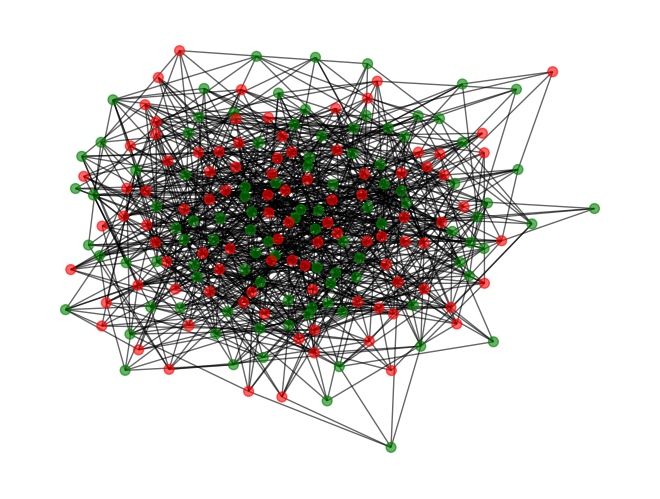

In [11]:
draw_graph(G,cut,pos)

In [12]:
print('cut-size: ',cut_size(G,cut))

cut-size:  714
